# **LAB Hyperparameter Tuning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import dates
import matplotlib.dates as mdates
from sklearn.svm import SVC

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`


In [2]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [3]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148727   96.450584   52.248001  108.671127   
2019-01-02   52.734001   86.302307   96.023270   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490761   51.273499  107.944550   
2019-01-04   53.903500   87.882889   96.792435   53.903500  112.160614   
2019-01-07   53.796001   88.504631   96.915894   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  162.139999  374.579987  141.490005  162.139999   
2023-12-26  141.520004  163.210007  374.660004  141.520004  163.210007   
2023-12-27  140.369995  163.460007  374.070007  140.369995  163.460007   
2023-12-28  140.229996  163.750000  375.279999  140.229996  163.750000   
2023-12-29  139.690002  163.550003  376.040009  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [4]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-02-04,109.96,1.3068
2019-02-05,109.99,1.2947
2019-02-06,109.75,1.2956
2019-02-07,109.70,1.2966
2019-02-08,109.76,1.2933
...,...,...
2024-01-22,147.95,1.2728
2024-01-23,148.55,1.2661
2024-01-24,147.31,1.2754


In [5]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-02-04,2724.87,25239.37,15.73
2019-02-05,2737.70,25411.52,15.57
2019-02-06,2731.61,25390.30,15.38
2019-02-07,2706.05,25169.53,16.37
2019-02-08,2707.88,25106.33,15.72
...,...,...,...
2024-01-29,4927.93,38333.45,13.60
2024-01-30,4924.97,38467.31,13.31
2024-01-31,4845.65,38150.30,14.35


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [6]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL','IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

In [7]:
### START CODE HERE ###
return_period = 3
k = [3, 6, 12]

Y = base.shift(-return_period)

### Choose calculation of difference price either past (Guide#1) or next (Guide#2) 
### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

### Guide#2 for using price of next [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)


### END CODE HERE ###

**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [8]:
### START CODE HERE ###

standard_scaler = preprocessing.StandardScaler()
# Standardize by group
X1_standardized = standard_scaler.fit_transform(X1)
X2_standardized = standard_scaler.fit_transform(X2)
X3_standardized = standard_scaler.fit_transform(X3)
X4_standardized = standard_scaler.fit_transform(X4)

#Standardize
X1 = pd.DataFrame(X1_standardized, columns=X1.columns, index=X1.index)
X2 = pd.DataFrame(X2_standardized, columns=X2.columns, index=X2.index)
X3 = pd.DataFrame(X3_standardized, columns=X3.columns, index=X3.index)
X4 = pd.DataFrame(X4_standardized, columns=X4.columns, index=X4.index)

### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [10]:
### START CODE HERE ###
X_standardized = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([X_standardized, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [11]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,-0.138106,-0.041555,0.064538,96.792435
2019-01-02,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,0.152494,-0.145501,0.113606,96.915894
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.501040,0.294882,0.319150,97.618591
2019-01-04,-1.490155,-1.812494,NaN,NaN,NaN,NaN,NaN,0.178058,-0.103676,0.103198,99.014488
2019-01-07,-1.493775,-1.772395,NaN,NaN,NaN,NaN,NaN,0.302479,-0.213159,0.090820,98.378265
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,NaN,NaN,NaN,NaN,1.796575,1.859942,-0.924231,NaN,NaN,NaN,NaN
2024-01-30,NaN,NaN,NaN,NaN,1.791881,1.894375,-0.959276,NaN,NaN,NaN,NaN
2024-01-31,NaN,NaN,NaN,NaN,1.666076,1.812830,-0.833596,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN,1.762095,1.907887,-0.890394,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [12]:
### START CODE HERE ###
dataset = dataset.dropna()

### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1186 entries, 2019-02-04 to 2023-11-07
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      1186 non-null   float64
 1   IBM        1186 non-null   float64
 2   DEXJPUS    1186 non-null   float64
 3   DEXUSUK    1186 non-null   float64
 4   SP500      1186 non-null   float64
 5   DJIA       1186 non-null   float64
 6   VIXCLS     1186 non-null   float64
 7   MSFT_3DT   1186 non-null   float64
 8   MSFT_6DT   1186 non-null   float64
 9   MSFT_12DT  1186 non-null   float64
 10  MSFT       1186 non-null   float64
dtypes: float64(11)
memory usage: 111.2 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,-0.009249,-0.051178,-0.076165,0.012985,-0.069901,-0.071860,0.050876,0.002795,0.004431,-0.001641,230.662493
std,0.979590,0.883749,0.953209,1.020369,0.972347,0.968815,1.006561,1.015865,1.014778,1.007593,68.817112
min,-1.556374,-2.632217,-1.151712,-3.202336,-2.470711,-3.218153,-1.173175,-3.221307,-3.657796,-3.311001,99.945114
25%,-0.932610,-0.749459,-0.786916,-0.735298,-1.038145,-1.004190,-0.620604,-0.468242,-0.560684,-0.485350,173.213558
50%,0.042715,-0.059738,-0.619192,0.034123,0.168149,0.199294,-0.173774,0.054131,0.058694,0.053452,239.243446
75%,0.819946,0.529617,0.854421,0.744850,0.764234,0.760675,0.505988,0.615021,0.624105,0.612171,285.322426
max,1.740315,2.074342,2.057839,2.042519,1.588217,1.465404,7.425059,2.983388,2.897416,3.128372,368.921234


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [13]:
### START CODE HERE ###
Y = dataset['MSFT']
X = dataset[dataset.columns.difference(['MSFT'])]

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

In [14]:
### START CODE HERE ###
x_corr = X.corr()
# don't count 1.0 detect only 0.9
mark = (x_corr.abs() > 0.9) & (x_corr.abs() < 1.0)

toDrop = [column for column in mark.columns if any(mark[column])]

X = X.drop(columns=toDrop)
### END CODE HERE ###

In [15]:
X

,DEXJPUS,DEXUSUK,IBM,MSFT_12DT,MSFT_3DT,MSFT_6DT,VIXCLS
2019-02-04,-0.663787,0.356942,-0.949169,0.140236,0.032336,0.189745,-0.666828
2019-02-05,-0.661820,0.174839,-0.931778,0.079884,-0.098053,0.082037,-0.686163
2019-02-06,-0.677559,0.188384,-0.894579,0.180719,-0.044569,0.120637,-0.709124
2019-02-07,-0.680838,0.203434,-0.970821,0.265098,0.213617,0.170471,-0.589486
2019-02-08,-0.676903,0.153769,-0.945407,0.254612,0.313038,0.061863,-0.668036
...,...,...,...,...,...,...,...
2023-11-01,2.025048,-1.059245,1.791839,1.020023,1.988365,2.160516,-0.529063
2023-11-02,1.993569,-0.987006,1.894509,0.915709,1.800315,1.765708,-0.675287
2023-11-03,1.920118,-0.687515,1.951265,0.671913,1.982411,1.480009,-0.765922
2023-11-06,1.947006,-0.661930,2.019499,0.550883,1.081173,0.953913,-0.768339


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [16]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split

test_size = 0.3
train_size = 0.7
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size)
### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.


<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [17]:
### START CODE HERE ###

linear_regression = LinearRegression()
svr = SVR()

# Define search space for grid search
param_grid_linear_regression = {'fit_intercept': [True, False]}
param_grid_svr = {'kernel': ['linear', 'rbf', 'poly'], 
                  'C': [0.1, 1, 10], 
                  'gamma': [0.01, 0.1, 1], 
                  'degree': [2, 3]}

print(f"Linear Regression: {param_grid_linear_regression}")
print(f"SVR: {param_grid_svr}")

### END CODE HERE ###

Linear Regression: {'fit_intercept': [True, False]}
SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'degree': [2, 3]}


Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.



In [ ]:
### START CODE HERE ###
# Perform grid search

grid_search_linear_regression = GridSearchCV(linear_regression, param_grid_linear_regression, cv=3)
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

# Fit the grid search models
grid_search_linear_regression.fit(X_train, Y_train)
grid_search_svr.fit(X_train, Y_train)

### END CODE HERE ###

In [37]:
# linear
# Print the best parameters and best score for Linear Regression
print("Best parameters for Linear Regression:", grid_search_linear_regression.best_params_)
print("Best score for Linear Regression:", grid_search_linear_regression.best_score_)

# Print the mean and standard deviation of scores for Linear Regression
print("Mean cross-validated score for Linear Regression:", grid_search_linear_regression.cv_results_['mean_test_score'])
print("Standard deviation of cross-validated score for Linear Regression:", grid_search_linear_regression.cv_results_['std_test_score'])

mean_squared_errors = -grid_search_linear_regression.cv_results_['mean_test_score']
# Print mean squared error for SVR
print("Mean of mean squared error for SVR:", mean_squared_errors.mean())


# SVR
# Print the best parameters and best score for SVR
print("\n--------------------------------------------------------------")
print("\nBest parameters for SVR:", grid_search_svr.best_params_)
print("Best score for SVR:", grid_search_svr.best_score_)

# Print the mean and standard deviation of scores for SVR
print("Mean cross-validated score for SVR:", grid_search_svr.cv_results_['mean_test_score'])
print("Standard deviation of cross-validated score for SVR:", grid_search_svr.cv_results_['std_test_score'])

mean_squared_errors = grid_search_svr.cv_results_['mean_test_score']
# Print mean squared error for SVR
print("Mean of mean squared error for SVR:", mean_squared_errors.mean())


Best parameters for Linear Regression: {'fit_intercept': True}
Best score for Linear Regression: 0.731682543671368
Mean cross-validated score for Linear Regression: [  0.73168254 -11.30149301]
Standard deviation of cross-validated score for Linear Regression: [0.02771679 1.25931135]
Mean of mean squared error for SVR: 5.284905232580097

--------------------------------------------------------------

Best parameters for SVR: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVR: 0.8222651267447263
Mean cross-validated score for SVR: [ 0.44623449  0.00311883 -0.02165614  0.44623449  0.08491982  0.01965451
  0.44623449  0.03752697  0.36747288  0.44623449  0.00311883 -0.02202694
  0.44623449  0.08491982  0.03139749  0.44623449  0.03752697  0.6073068
  0.70965113  0.17075522 -0.01771525  0.70965113  0.50964728  0.17364523
  0.70965113  0.42087709  0.39936363  0.70965113  0.17075522 -0.0212609
  0.70965113  0.50964728  0.16114557  0.70965113  0.42087709  0.70016579
  0.718

Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
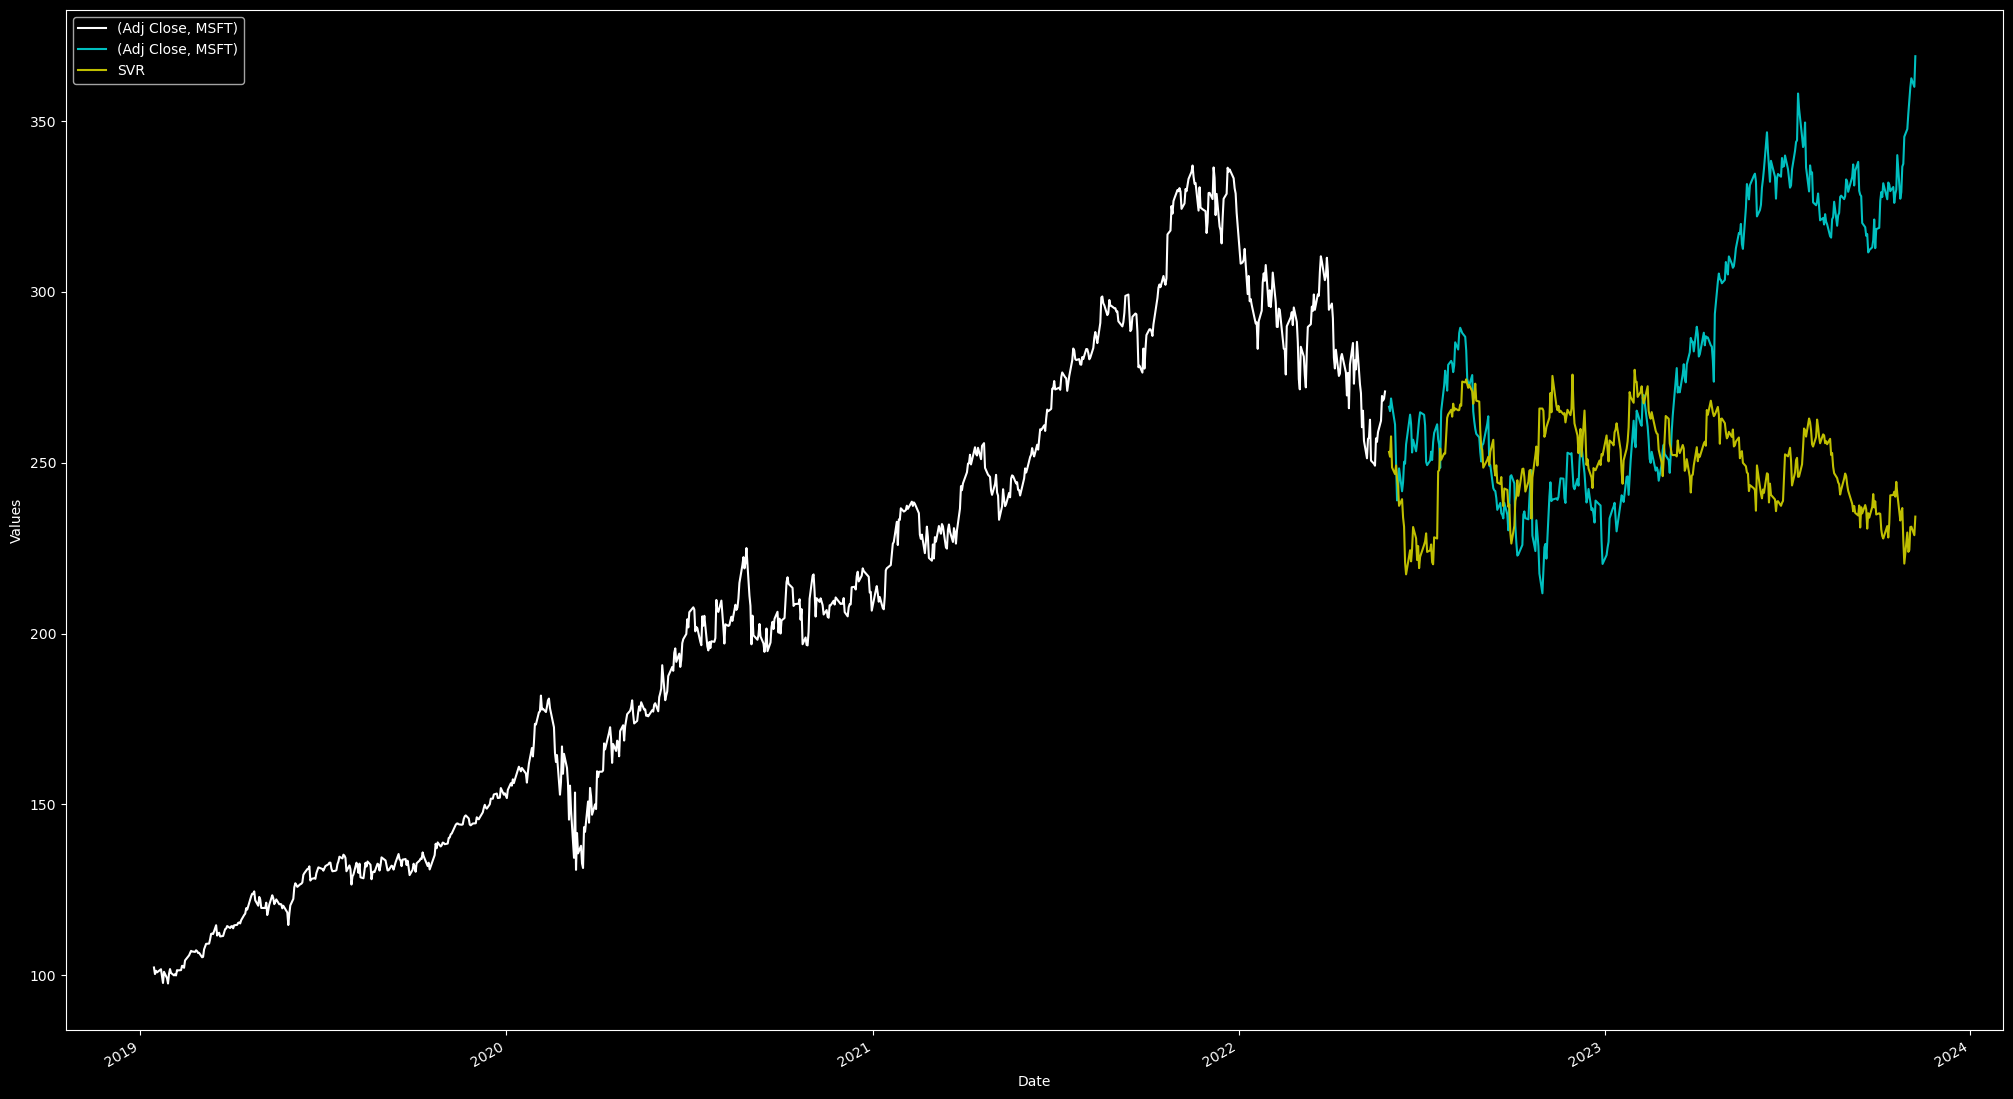

</details>

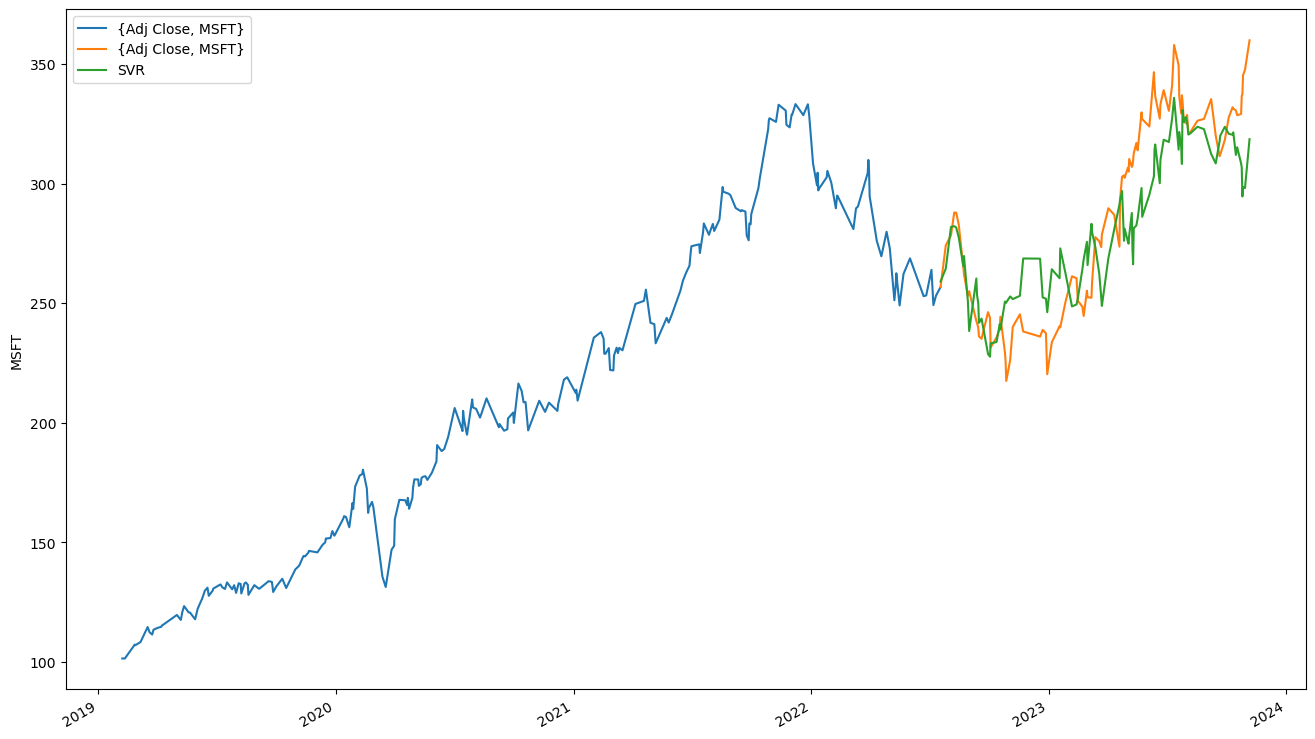

In [19]:
### START CODE HERE ###

# Create Linear Regression and SVR model with best parameters


best_linear_regression = LinearRegression(**grid_search_linear_regression.best_params_)
best_svr = SVR(**grid_search_svr.best_params_)

# Fit the models with training data
best_linear_regression.fit(X_train, Y_train)
best_svr.fit(X_train, Y_train)

# Predict values using the models
predicted_linear_regression = best_linear_regression.predict(X_test)
predicted_svr = best_svr.predict(X_test)

# Compare predicted values with actual values (Y_test)
# comparison_linear_regression = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted_linear_regression})
comparison_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted_svr})

start_date = '2019-01-01'
end_date = '2023-12-31'

# RL_to_plot = comparison_linear_regression[(comparison_linear_regression.index >= start_date) & (comparison_linear_regression.index <= end_date)]
SVR_to_plot = comparison_svr[(comparison_svr.index >= start_date) & (comparison_svr.index <= end_date)]

# RL_to_plot_filtered = RL_to_plot[(RL_to_plot.index >= start_date) & (RL_to_plot.index <= end_date)]
SVR_to_plot_filtered = SVR_to_plot[(SVR_to_plot.index >= '2022-07-15') & (SVR_to_plot.index <= end_date)]
actual_data_filtered = Y_test[(Y_test.index >= start_date) & (Y_test.index <= '2022-07-25')]
actual_data_filtered2 = Y_test[(Y_test.index >= '2022-07-15') & (Y_test.index <= end_date)]

plt.figure(figsize=(16, 10))

sns.lineplot(data=actual_data_filtered, label='{Adj Close, MSFT}')
sns.lineplot(data=actual_data_filtered2, label='{Adj Close, MSFT}')
sns.lineplot(data=SVR_to_plot_filtered['Predicted'], label='SVR')

# Set major locator to display only years
plt.gca().xaxis.set_major_locator(dates.YearLocator())
# Set major formatter to display only year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()
### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [21]:
# Initialize models
linear_regression = LinearRegression()
svm_reg = SVR()

# Define search space for random search
param_distributions_linear_regression = {'fit_intercept': [True, False]}
param_distribs = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [1.0, 3.25, 5.5, 7.75, 10.0], #1 10 5     np.linspace(1, 10, 5).tolist() np.logspace [1.0, 3.25, 5.5, 7.75, 10.0]
        'gamma': [0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0], #0.1 10 5   np.logspace(np.log10(0.1), np.log10(10), 5).tolist()
        'degree': [2, 3],
    }

print(f"Linear Regression: {param_distributions_linear_regression}")
print(f"SVR: {param_distribs}")

LR_rnd_search = RandomizedSearchCV(linear_regression, param_distributions=param_distributions_linear_regression,
                                n_iter=30, cv=3, scoring='neg_mean_squared_error',)
LR_rnd_search.fit(X_train, Y_train)





Linear Regression: {'fit_intercept': [True, False]}
SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [1.0, 3.25, 5.5, 7.75, 10.0], 'gamma': [0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0], 'degree': [2, 3]}


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=30. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LinearRegression(), n_iter=30,
                   param_distributions={'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [22]:
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=30, cv=5, scoring='neg_mean_squared_error',)

rnd_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30,
                   param_distributions={'C': [1.0, 3.25, 5.5, 7.75, 10.0],
                                        'degree': [2, 3],
                                        'gamma': [0.1, 0.31622776601683794, 1.0,
                                                  3.1622776601683795, 10.0],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='neg_mean_squared_error')

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [23]:
# Print the best parameters and best score for Linear Regression
print("Best parameters for Linear Regression:", LR_rnd_search.best_params_)
print("Best score for Linear Regression:", LR_rnd_search.best_score_)

# Print the mean and standard deviation of scores for Linear Regression
print("Mean cross-validated score for Linear Regression:", LR_rnd_search.cv_results_['mean_test_score'])
print("Standard deviation of cross-validated score for Linear Regression:", LR_rnd_search.cv_results_['std_test_score'])

mean_squared_errors = -LR_rnd_search.cv_results_['mean_test_score']
# Print mean squared error for SVR
print("Mean of mean squared error for SVR:", mean_squared_errors.mean())


# Print the best parameters and best score for SVR
print("\n\nBest parameters for SVR:", rnd_search.best_params_)
print("Best score for SVR:", rnd_search.best_score_)

# Print the mean and standard deviation of scores for SVR
print("Mean cross-validated score for SVR:", rnd_search.cv_results_['mean_test_score'])
print("Standard deviation of cross-validated score for SVR:", rnd_search.cv_results_['std_test_score'])

mean_squared_errors = -rnd_search.cv_results_['mean_test_score']
# Print mean squared error for SVR
print("Mean of mean squared error for SVR:", mean_squared_errors.mean())


Best parameters for Linear Regression: {'fit_intercept': True}
Best score for Linear Regression: -1224.4534916654109
Mean cross-validated score for Linear Regression: [ -1224.45349167 -56065.38019002]
Standard deviation of cross-validated score for Linear Regression: [  66.02178986 1237.32800728]
Mean of mean squared error for SVR: 28644.9168408418


Best parameters for SVR: {'kernel': 'rbf', 'gamma': 0.31622776601683794, 'degree': 2, 'C': 10.0}
Best score for SVR: -733.4584137771238
Mean cross-validated score for SVR: [-1285.23922064  -964.02279192 -1352.80894333  -970.56614441
 -1619.84401544 -2651.85045908 -3793.13481057 -1285.23922064
 -3843.1222361  -3844.35298966 -1350.86754786 -1321.66091431
 -1278.41626117 -2348.13172612 -1278.41626117 -2670.40315804
 -1888.61079365 -1083.86271774 -1277.23655724 -1321.66091431
  -733.45841378  -927.7602801  -2806.75537558 -2658.32415699
 -1277.23655724 -1321.66091431 -2683.20225759 -1285.23922064
 -2653.91747411 -1348.12014652]
Standard deviati

Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
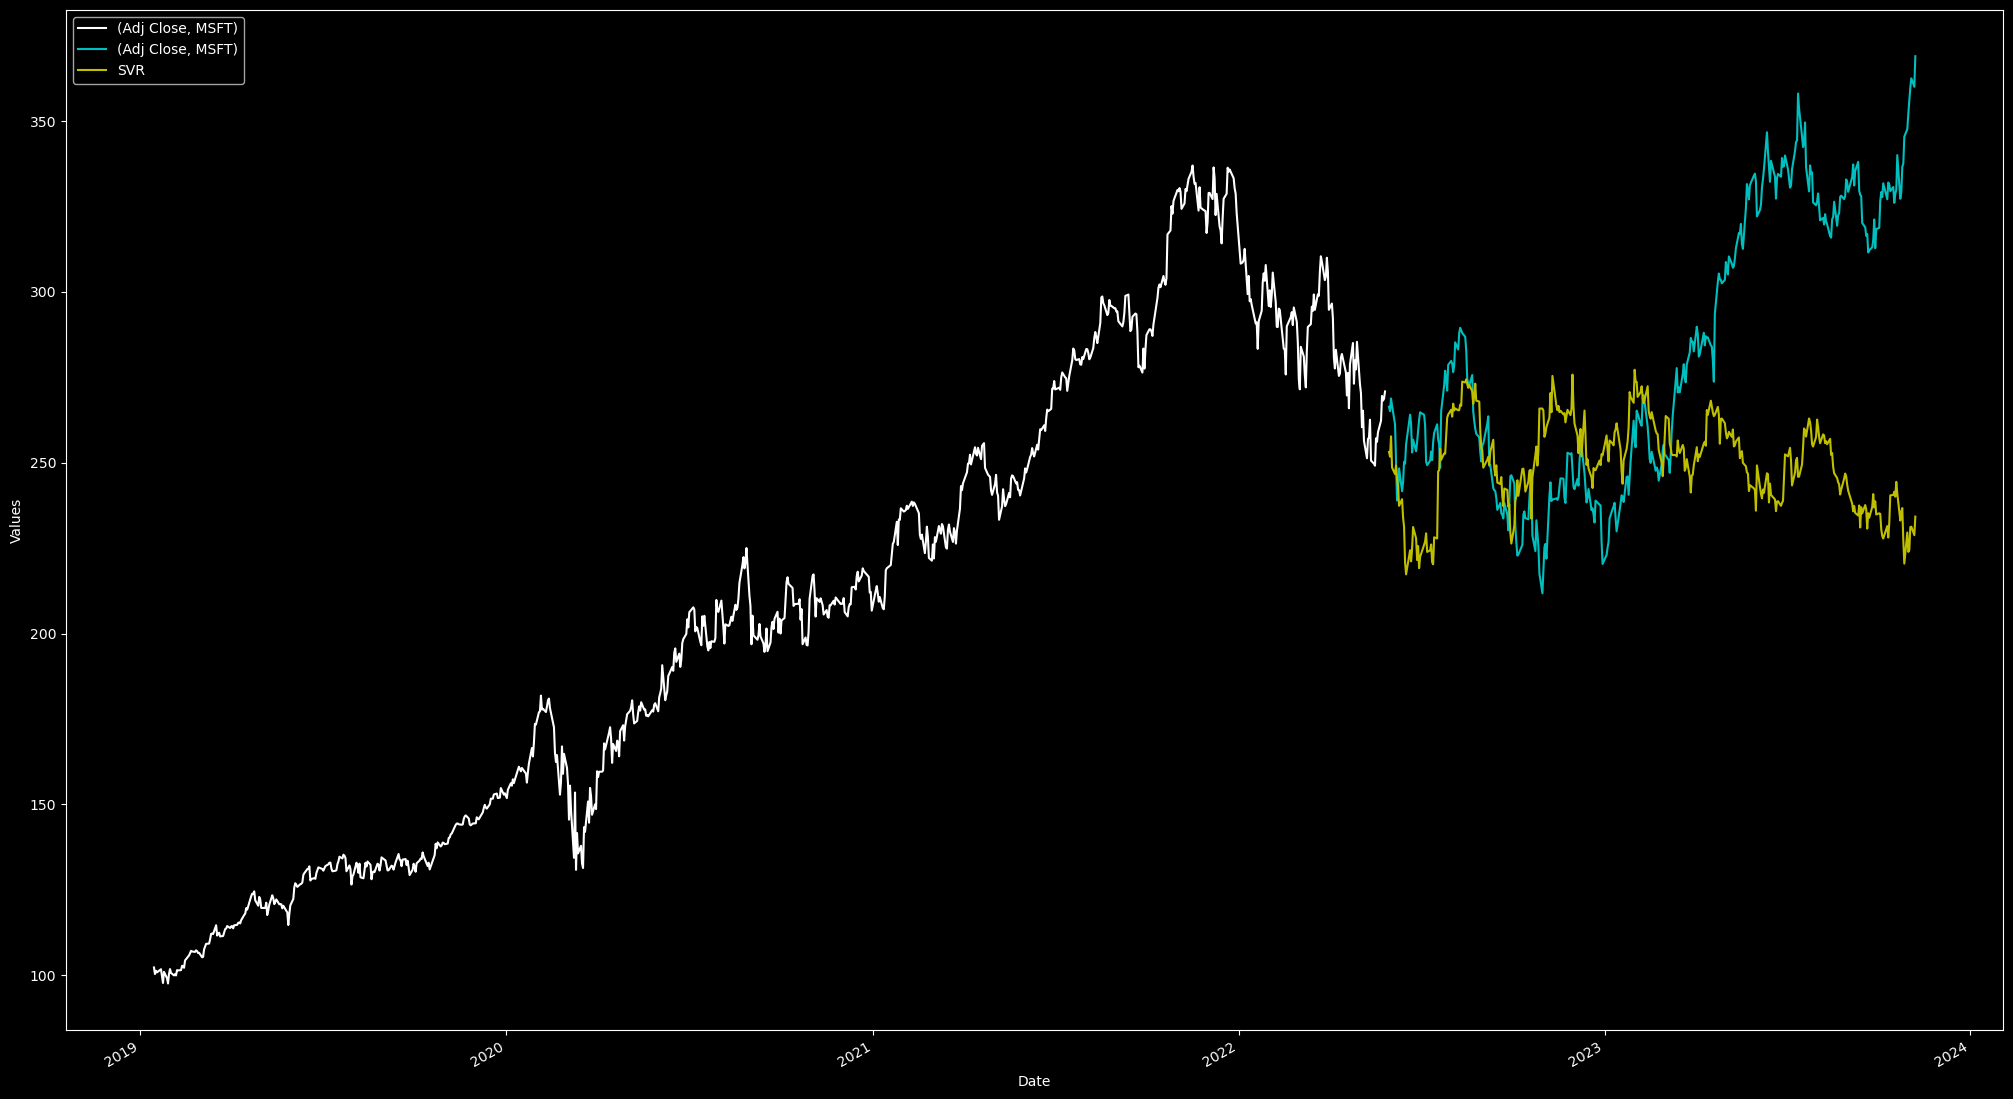

</details>

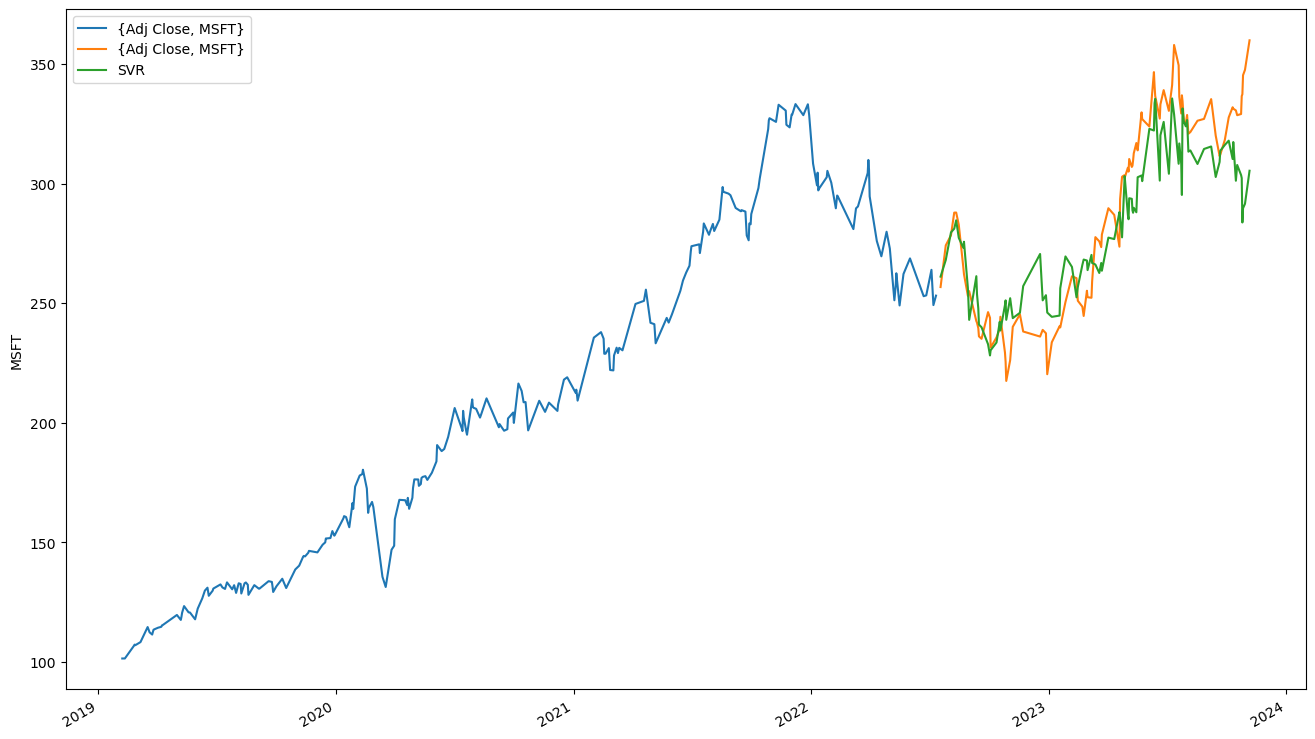

In [24]:
### START CODE HERE ###

best_linear_regression = LinearRegression(**LR_rnd_search.best_params_)
best_svr = SVR(**rnd_search.best_params_)

# Fit the models with training data
best_linear_regression.fit(X_train, Y_train)
best_svr.fit(X_train, Y_train)

# Predict values using the models
predicted_linear_regression = best_linear_regression.predict(X_test)
predicted_svr = best_svr.predict(X_test)

# Compare predicted values with actual values (Y_test)
# comparison_linear_regression = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted_linear_regression})
comparison_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted_svr})

start_date = '2019-01-01'
end_date = '2023-12-31'

# RL_to_plot = comparison_linear_regression[(comparison_linear_regression.index >= start_date) & (comparison_linear_regression.index <= end_date)]
SVR_to_plot = comparison_svr[(comparison_svr.index >= start_date) & (comparison_svr.index <= end_date)]

# RL_to_plot_filtered = RL_to_plot[(RL_to_plot.index >= start_date) & (RL_to_plot.index <= end_date)]
SVR_to_plot_filtered = SVR_to_plot[(SVR_to_plot.index >= '2022-07-15') & (SVR_to_plot.index <= end_date)]
actual_data_filtered = Y_test[(Y_test.index >= start_date) & (Y_test.index <= '2022-07-15')]
actual_data_filtered2 = Y_test[(Y_test.index >= '2022-07-15') & (Y_test.index <= end_date)]

plt.figure(figsize=(16, 10))

sns.lineplot(data=actual_data_filtered, label='{Adj Close, MSFT}')
sns.lineplot(data=actual_data_filtered2, label='{Adj Close, MSFT}')
sns.lineplot(data=SVR_to_plot_filtered['Predicted'], label='SVR')

# Set major locator to display only years
plt.gca().xaxis.set_major_locator(dates.YearLocator())
# Set major formatter to display only year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.show()

### START CODE HERE ###

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??

In [31]:
results = grid_search_svr.cv_results_

# Get the indices of the top 3 mean_test_score values
top_3_indices = np.argsort(results['mean_test_score'])[-3:]

# Extract the best parameters for the top 3 models
best_parameters_top_3 = [results['params'][i] for i in top_3_indices]

print("-------GridSearchCV-------")
# Print the best parameters for the top 3 models
for i, params in enumerate(best_parameters_top_3, 1):
    print(f"Rank {i} - Best parameters: {params}")
print("--------------------------")


results = rnd_search.cv_results_

# Get the indices of the top 3 mean_test_score values
top_3_indices = np.argsort(results['mean_test_score'])[-3:]

# Extract the best parameters for the top 3 models
best_parameters_top_3 = [results['params'][i] for i in top_3_indices]

print("\n\n-----RandomizedSearchCV-----")
# Print the best parameters for the top 3 models
for i, params in enumerate(best_parameters_top_3, 1):
    print(f"Rank {i} - Best parameters: {params}")
print("----------------------------")


-------GridSearchCV-------
Rank 1 - Best parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
Rank 2 - Best parameters: {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Rank 3 - Best parameters: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
--------------------------


-----RandomizedSearchCV-----
Rank 1 - Best parameters: {'kernel': 'rbf', 'gamma': 1.0, 'degree': 3, 'C': 10.0}
Rank 2 - Best parameters: {'kernel': 'rbf', 'gamma': 0.31622776601683794, 'degree': 2, 'C': 5.5}
Rank 3 - Best parameters: {'kernel': 'rbf', 'gamma': 0.31622776601683794, 'degree': 2, 'C': 10.0}
----------------------------


### ANS 
3. เหมือนบ้างบางส่วน คิดว่าที่แตกต่างกันน่าจะเกิดจาก RandomizedSearchCV 
4. GridSearchCV Mean of mean squared error for SVR: 0.8222651267447263
5. RandomizedSearchCV Mean of mean squared error for SVR: 1837.504082676205